In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import imblearn
from sklearn.utils import resample
#from imblearn.combine import SMOTETomek

df = pd.read_csv("C:/Users/owcha/Desktop/application_train.csv")


In [49]:
#Rendu compte de nombreuses données manquantes entrée 28 et 44.
df = df.dropna(axis=0)

In [50]:
print('Datashape: ', df.shape)
df.head()

Datashape:  (8602, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [53]:
#Besoin de split notre dataset car cross validation->def de cross validation.

dfTrain = df.iloc[:round(df.shape[0] * 0.9),:] #90%
dfRow = df.iloc[round(df.shape[0] * 0.9):,:]  
dfTest = dfRow.iloc[:(dfRow.shape[0]-5),:]
dfKeep = dfRow.iloc[(dfRow.shape[0]-5):,:]

print('dfTrain: ',dfTrain.shape)
print('dfTest: ',dfTest.shape)
print('dfKeep: ',dfKeep.shape)

dfTrain:  (7742, 122)
dfTest:  (855, 122)
dfKeep:  (5, 122)


0    0.938646
1    0.061354
Name: TARGET, dtype: float64


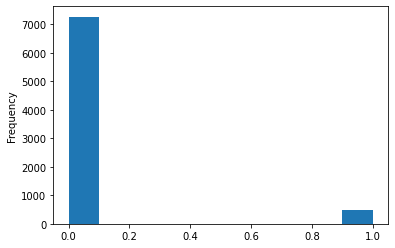

In [54]:
#On regarde la sortie
print( pd.value_counts(dfTrain['TARGET'], normalize=True) )

dfTrain['TARGET'].astype(int).plot.hist();

Training data shape:  (14380, 122)


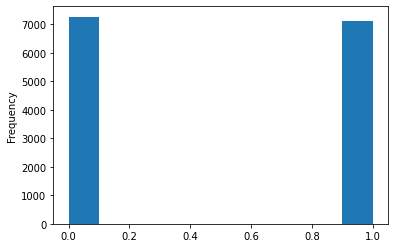

In [55]:
#Oversampling car jeu de données réduit

# Separate majority and minority classes
df_majority = dfTrain[dfTrain['TARGET']==0]
df_minority = dfTrain[dfTrain['TARGET']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=round(dfTrain.shape[0] * 0.918744),  # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
dfTrainUpsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
dfTrainUpsampled['TARGET'].value_counts()
print('Training data shape: ', dfTrainUpsampled.shape)

dfTrainUpsampled['TARGET'].astype(int).plot.hist();

In [56]:
#Traitement des données manquantes.
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(dfTrainUpsampled)

Your selected dataframe has 122 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [59]:
def missing_values_by_row(df):
    count = 0
    for index, row in df.iterrows():
        for prop in row:
            if not prop:
                count += 1
                break;
                
    print(count) 
    
missing_values_by_row(dfKeep)

5


In [60]:
print( dfTrain.dtypes.value_counts() )
            

float64    65
int64      41
object     16
dtype: int64
